In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Mengambil data dari file JSON
data_url = "https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json"
data = pd.read_json(data_url)
df = pd.DataFrame(data)
df

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency
0,1,GOOGL,1/5/2017,3,675.51,501030,1,1,sell,EUR
1,2,NVDA,3/27/2017,13,559.39,51823,2,2,buy,ZAR
2,3,NFLX,11/7/2015,0,811.33,684430,3,3,sell,ZWL
3,4,MSFT,5/29/2017,22,231.21,237465,4,4,buy,IDR
4,5,JPM,11/8/2012,16,699.15,800344,5,5,buy,HRK
...,...,...,...,...,...,...,...,...,...,...
995,996,JPM,11/11/2014,19,208.69,54629,996,996,buy,CNY
996,997,GOOGL,9/24/2018,9,829.10,365834,997,997,sell,RUB
997,998,MSFT,5/2/2012,16,346.35,891372,998,998,sell,EUR
998,999,NVDA,10/9/2010,0,935.36,483631,999,999,sell,PKR


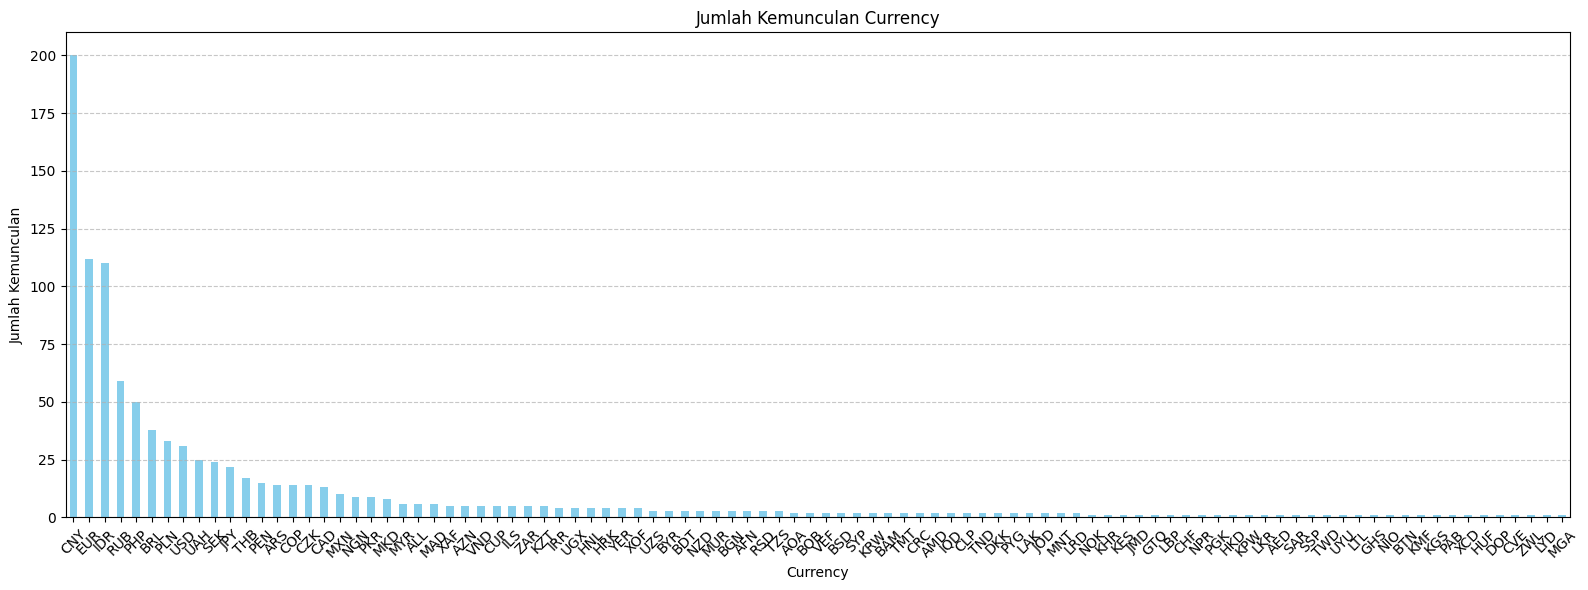

Currency yang tersedia:
['CNY', 'EUR', 'IDR', 'RUB', 'PHP', 'BRL', 'PLN', 'USD', 'UAH', 'SEK', 'JPY', 'THB', 'PEN', 'ARS', 'COP', 'CZK', 'CAD', 'MXN', 'NGN', 'PKR', 'MKD', 'MYR', 'ALL', 'MAD', 'XAF', 'AZN', 'VND', 'CUP', 'ILS', 'ZAR', 'KZT', 'IRR', 'UGX', 'HNL', 'HRK', 'YER', 'XOF', 'UZS', 'BYR', 'BDT', 'NZD', 'MUR', 'BGN', 'AFN', 'RSD', 'TZS', 'AOA', 'BOB', 'VEF', 'BSD', 'SYP', 'KRW', 'BAM', 'TMT', 'CRC', 'AMD', 'IQD', 'CLP', 'TND', 'DKK', 'PYG', 'LAK', 'JOD', 'MNT', 'LRD', 'NOK', 'KHR', 'KES', 'JMD', 'GTQ', 'LBP', 'CHF', 'NPR', 'PGK', 'HKD', 'KPW', 'LKR', 'AED', 'SAR', 'SSP', 'TWD', 'UYU', 'LTL', 'GHS', 'NIO', 'BTN', 'KMF', 'KGS', 'PAB', 'XCD', 'HUF', 'DOP', 'CVE', 'ZWL', 'LYD', 'MGA']


In [48]:
# Menghitung jumlah kemunculan setiap currency
currency_counts = df['currency'].value_counts()

# Membuat visualisasi
plt.figure(figsize=(16, 6))
currency_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Kemunculan Currency')
plt.xlabel('Currency')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

# Print currency yang tersedia
print("Currency yang tersedia:")
print(currency_counts.index.tolist())

In [49]:
# Dictionary untuk nilai tukar mata uang terhadap IDR
exchange_rates = {
    'CNY': 1964.68,
    'EUR': 17269.95,
    'IDR': 1,  # 1 IDR = 1 IDR
    'RUB': 180.36,
    'PHP': 316.61,
    'BRL': 2620.87,
    'PLN': 4128.67,
    'USD': 14231.00,
    'UAH': 506.56,
    'SEK': 1619.51,
    'JPY': 129.42,
    'THB': 449.85,
    'PEN': 3786.73,
    'ARS': 146.87,
    'COP': 3.88,
    'CZK': 631.03,
    'CAD': 11192.41,
    'MXN': 704.26,
    'NGN': 35.00,
    'PKR': 88.22,
    'MKD': 274.75,
    'MYR': 3487.84,
    'ALL': 140.48,
    'MAD': 1592.17,
    'XAF': 25.66,
    'AZN': 8376.83,
    'VND': 0.62,
    'CUP': 337.61,
    'ILS': 4351.39,
    'ZAR': 960.60,
    'KZT': 33.67,
    'IRR': 0.34,
    'UGX': 3.98,
    'HNL': 571.49,
    'HRK': 2270.54,
    'YER': 56.93,
    'XOF': 25.66,
    'UZS': 1.35,
    'BYR': 5.66,
    'BDT': 167.81,
    'NZD': 9775.88,
    'MUR': 356.36,
    'BGN': 8198.60,
    'AFN': 179.12,
    'RSD': 141.68,
    'TZS': 6.17,
    'AOA': 32.80,
    'BOB': 2059.89,
    'VEF': 0.0016,
    'BSD': 14232.23,
    'SYP': 28.16,
    'KRW': 12.62,
    'BAM': 8547.21,
    'TMT': 4058.24,
    'CRC': 22.60,
    'AMD': 28.02,
    'IQD': 9.70,
    'CLP': 17.91,
    'TND': 5021.48,
    'DKK': 2245.47,
    'PYG': 2.01,
    'LAK': 1.52,
    'JOD': 20112.27,
    'MNT': 0.005,
    'LRD': 70.42,
    'NOK': 1661.21,
    'KHR': 3.51,
    'KES': 127.82,
    'JMD': 94.73,
    'GTQ': 1841.10,
    'LBP': 9.42,
    'CHF': 15530.25,
    'NPR': 121.26,
    'PGK': 4018.34,
    'HKD': 1828.20,
    'KPW': 12.79,
    'LKR': 71.53,
    'AED': 3878.97,
    'SAR': 3795.39,
    'SSP': 35.27,
    'TWD': 505.14,
    'UYU': 330.45,
    'LTL': 4252.82,
    'GHS': 2421.76,
    'NIO': 406.28,
    'BTN': 196.31,
    'KMF': 34.74,
    'KGS': 167.84,
    'PAB': 14232.23,
    'XCD': 5267.42,
    'HUF': 47.79,
    'DOP': 259.23,
    'CVE': 147.80,
    'ZWL': 34.42,
    'LYD': 3192.81,
    'MGA': 3.75
}
# Konversi nilai transaksi ke int
df['trade_price'] = df['trade_price'].astype(int)

# Konversi nilai transaksi ke IDR
for idx, row in df.iterrows():
    currency = row['currency']
    if currency != 'IDR':  # Pastikan tidak perlu konversi jika mata uang sudah IDR
        exchange_rate = exchange_rates.get(currency)
        if exchange_rate is not None:  # Pastikan nilai tukar tersedia
            # Konversi harga perdagangan (trade_price) ke IDR
            df.loc[idx, 'trade_price_idr'] = row['trade_price'] * exchange_rate
            # Ubah mata uang transaksi menjadi "IDR"
            df.loc[idx, 'currency'] = "IDR"
        else:
            print(f"Nilai tukar untuk mata uang {currency} tidak tersedia.")

# Tampilkan hasil konversi
print("Data Transaksi dalam IDR:")
print(df.to_json(orient='records', indent=4))

Data Transaksi dalam IDR:
[
    {
        "trade_id":1,
        "stock_symbol":"GOOGL",
        "trade_date":"1\/5\/2017",
        "trade_time":3,
        "trade_price":675,
        "trade_volume":501030,
        "buyer_id":1,
        "seller_id":1,
        "trade_type":"sell",
        "currency":"IDR",
        "trade_price_idr":11657216.25
    },
    {
        "trade_id":2,
        "stock_symbol":"NVDA",
        "trade_date":"3\/27\/2017",
        "trade_time":13,
        "trade_price":559,
        "trade_volume":51823,
        "buyer_id":2,
        "seller_id":2,
        "trade_type":"buy",
        "currency":"IDR",
        "trade_price_idr":536975.4
    },
    {
        "trade_id":3,
        "stock_symbol":"NFLX",
        "trade_date":"11\/7\/2015",
        "trade_time":0,
        "trade_price":811,
        "trade_volume":684430,
        "buyer_id":3,
        "seller_id":3,
        "trade_type":"sell",
        "currency":"IDR",
        "trade_price_idr":27914.62
    },
    {
       

In [50]:
df_convert = pd.DataFrame(df)
df_convert

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency,trade_price_idr
0,1,GOOGL,1/5/2017,3,675,501030,1,1,sell,IDR,11657216.25
1,2,NVDA,3/27/2017,13,559,51823,2,2,buy,IDR,536975.40
2,3,NFLX,11/7/2015,0,811,684430,3,3,sell,IDR,27914.62
3,4,MSFT,5/29/2017,22,231,237465,4,4,buy,IDR,NaN
4,5,JPM,11/8/2012,16,699,800344,5,5,buy,IDR,1587107.46
...,...,...,...,...,...,...,...,...,...,...,...
995,996,JPM,11/11/2014,19,208,54629,996,996,buy,IDR,408653.44
996,997,GOOGL,9/24/2018,9,829,365834,997,997,sell,IDR,149518.44
997,998,MSFT,5/2/2012,16,346,891372,998,998,sell,IDR,5975402.70
998,999,NVDA,10/9/2010,0,935,483631,999,999,sell,IDR,82485.70


In [51]:
df_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trade_id         1000 non-null   int64  
 1   stock_symbol     1000 non-null   object 
 2   trade_date       1000 non-null   object 
 3   trade_time       1000 non-null   int64  
 4   trade_price      1000 non-null   int32  
 5   trade_volume     1000 non-null   int64  
 6   buyer_id         1000 non-null   int64  
 7   seller_id        1000 non-null   int64  
 8   trade_type       1000 non-null   object 
 9   currency         1000 non-null   object 
 10  trade_price_idr  890 non-null    float64
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 82.2+ KB


In [52]:
df_convert = df_convert.dropna()
df_convert

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency,trade_price_idr
0,1,GOOGL,1/5/2017,3,675,501030,1,1,sell,IDR,11657216.25
1,2,NVDA,3/27/2017,13,559,51823,2,2,buy,IDR,536975.40
2,3,NFLX,11/7/2015,0,811,684430,3,3,sell,IDR,27914.62
4,5,JPM,11/8/2012,16,699,800344,5,5,buy,IDR,1587107.46
5,6,AAPL,7/15/2013,16,425,884466,6,6,sell,IDR,76126.00
...,...,...,...,...,...,...,...,...,...,...,...
995,996,JPM,11/11/2014,19,208,54629,996,996,buy,IDR,408653.44
996,997,GOOGL,9/24/2018,9,829,365834,997,997,sell,IDR,149518.44
997,998,MSFT,5/2/2012,16,346,891372,998,998,sell,IDR,5975402.70
998,999,NVDA,10/9/2010,0,935,483631,999,999,sell,IDR,82485.70


# a. Harga beli saham yang tertinggi dalam rupiah (IDR)

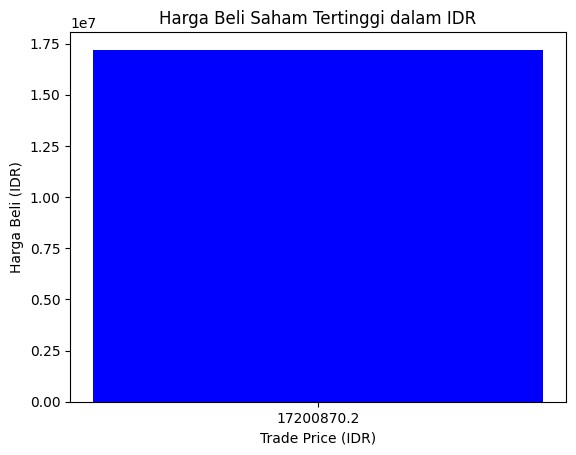

In [53]:
# Ambil harga beli saham tertinggi dalam IDR
highest_price_idr = df_convert[df_convert['currency'] == 'IDR']['trade_price_idr'].max()

# Visualisasi
plt.bar('Harga Beli Tertinggi (IDR)', highest_price_idr, color='blue')
plt.xticks([0], [highest_price_idr])  # Menetapkan nilai dan label sumbu x
plt.xlabel('Trade Price (IDR)')
plt.ylabel('Harga Beli (IDR)')
plt.title('Harga Beli Saham Tertinggi dalam IDR')
plt.show()

# b. Perkembangan transaksi pembelian saham TSLA.

In [57]:
# 2. Perkembangan transaksi pembelian saham TSLA
tsla_transactions = df_convert[df_convert['stock_symbol'] == 'TSLA']
tsla_transactions['trade_date'] = pd.to_datetime(tsla_transactions['trade_date'])  # Ubah kolom tanggal ke format datetime
tsla_transactions = tsla_transactions.sort_values(by='trade_date', ascending=True)  # Urutkan berdasarkan tanggal transaksi menurun

C:\Users\ACER\AppData\Local\Temp\ipykernel_8356\3777146254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_transactions['trade_date'] = pd.to_datetime(tsla_transactions['trade_date'])  # Ubah kolom tanggal ke format datetime


In [58]:
tsla_transactions

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency,trade_price_idr
190,191,TSLA,2010-01-04,15,517,895319,191,191,buy,IDR,1015739.56
155,156,TSLA,2010-01-15,12,187,874238,156,156,sell,IDR,3229480.65
726,727,TSLA,2010-02-11,15,746,747964,727,727,buy,IDR,1465651.28
569,570,TSLA,2010-02-14,0,799,24888,570,570,sell,IDR,8942735.59
84,85,TSLA,2010-03-02,12,85,786279,85,85,buy,IDR,38237.25
...,...,...,...,...,...,...,...,...,...,...,...
19,20,TSLA,2021-06-04,23,637,945403,20,20,sell,IDR,1251501.16
226,227,TSLA,2021-08-10,12,174,652644,227,227,buy,IDR,341854.32
152,153,TSLA,2021-09-08,4,149,367619,153,153,buy,IDR,26873.64
596,597,TSLA,2021-10-12,23,352,327116,597,597,buy,IDR,691567.36


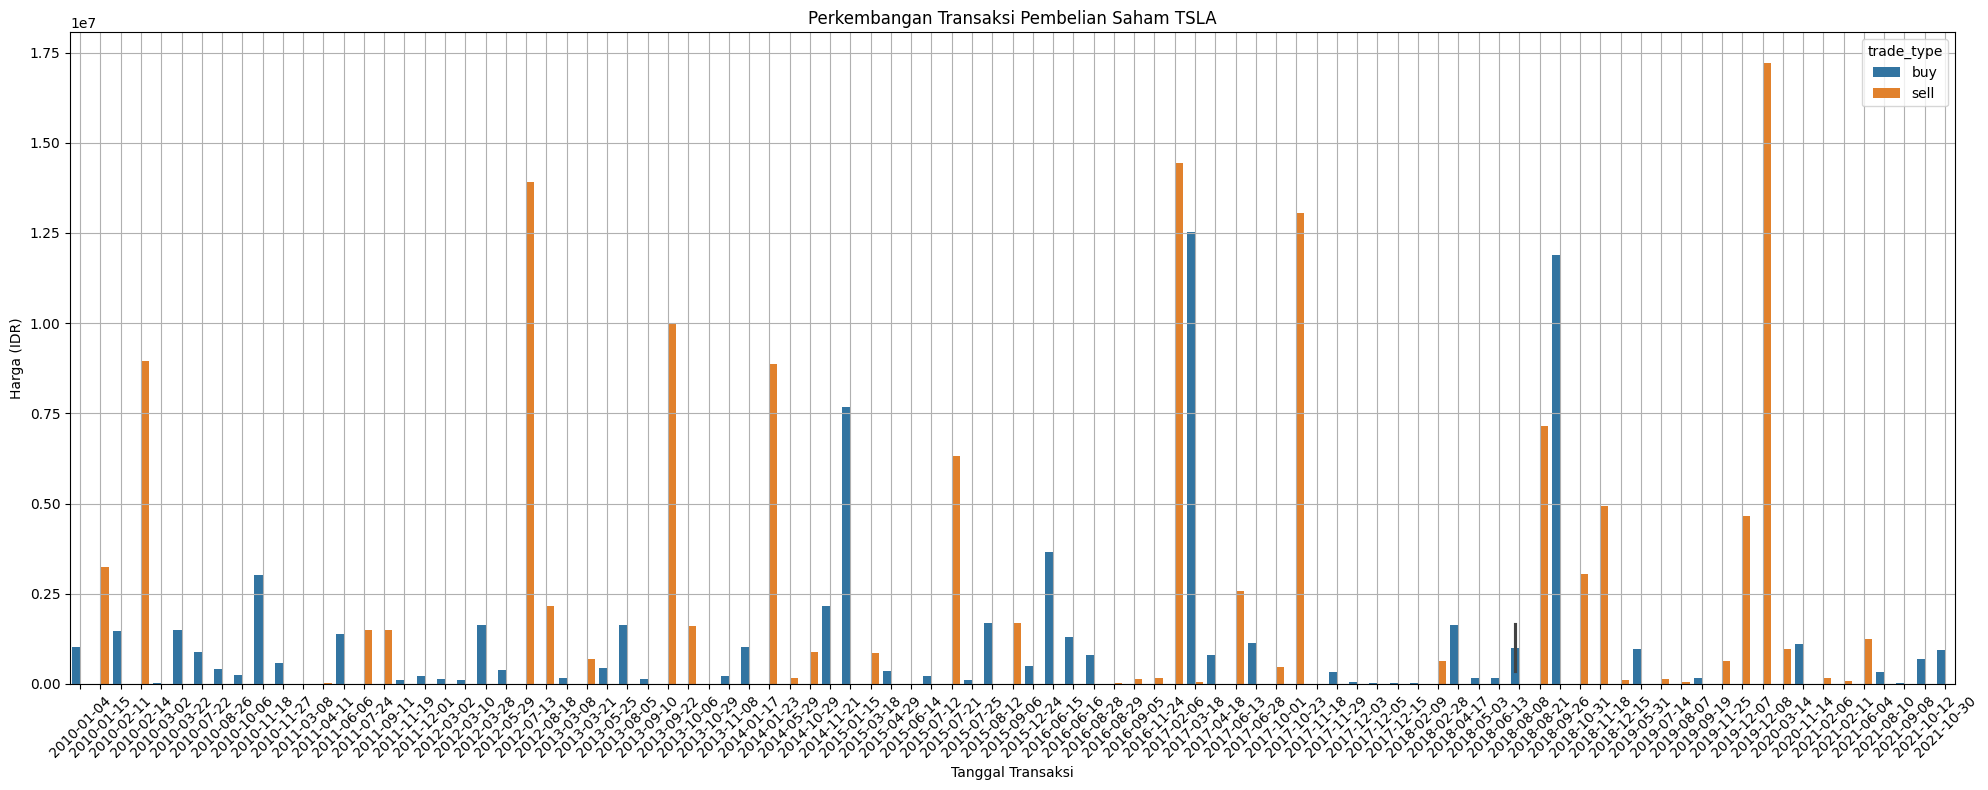

In [71]:
plt.figure(figsize=(20, 8))
sns.barplot(x='trade_date', y='trade_price_idr', data=tsla_transactions, hue='trade_type')
plt.title('Perkembangan Transaksi Pembelian Saham TSLA')
plt.xlabel('Tanggal Transaksi')
plt.grid(True)
plt.ylabel('Harga (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# c. Persentase jenis saham yang dilakukan proses jual-beli. Jenis saham dapat dilihat pada bagian stock_symbol.

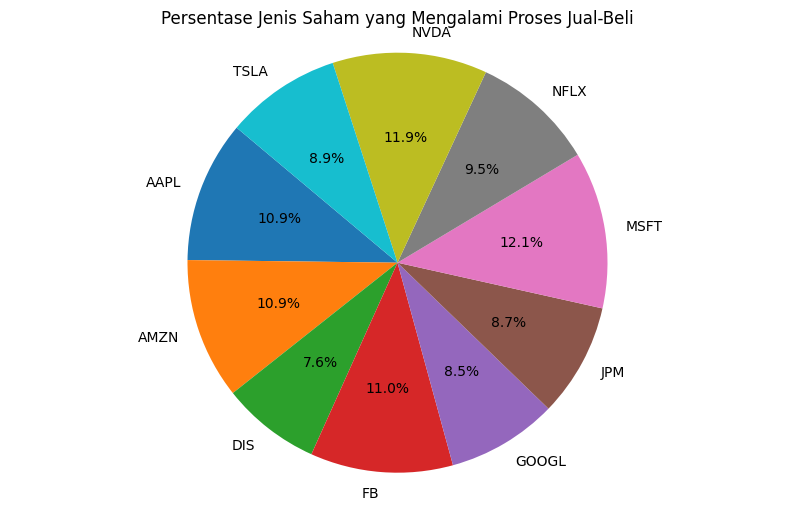

In [77]:
# Menghitung jumlah transaksi jual dan beli untuk setiap jenis saham
stock_type_counts = df_convert.groupby(['stock_symbol', 'trade_type']).size().unstack(fill_value=0)

# Menghitung total transaksi untuk setiap jenis saham
stock_type_counts['total'] = stock_type_counts.sum(axis=1)

# Menghitung persentase transaksi jual dan beli untuk setiap jenis saham
stock_type_counts['sell_percentage'] = stock_type_counts['sell'] / stock_type_counts['total'] * 100
stock_type_counts['buy_percentage'] = stock_type_counts['buy'] / stock_type_counts['total'] * 100

# Membuat visualisasi menggunakan pie chart
plt.figure(figsize=(10, 6))
plt.pie(stock_type_counts['sell_percentage'], labels=stock_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Jenis Saham yang Mengalami Proses Jual-Beli')
plt.axis('equal')
plt.show()

# d. Jenis transaksi yang banyak dilakukan (buy / sell).

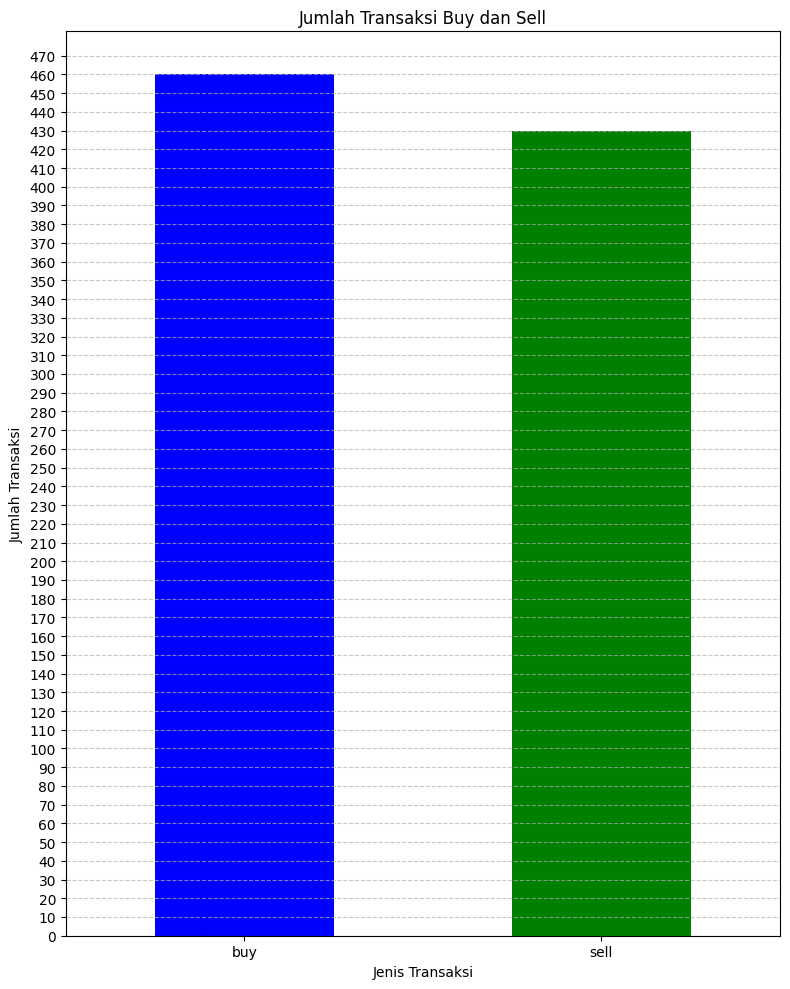

In [89]:
# Menghitung jumlah transaksi buy dan sell
transaction_counts = df_convert['trade_type'].value_counts()

# Membuat visualisasi menggunakan bar plot
plt.figure(figsize=(8, 10))
transaction_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Jumlah Transaksi Buy dan Sell')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.yticks(range(0, int(transaction_counts.max())+20, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# e. Persentase jenis transaksi yang dilakukan.

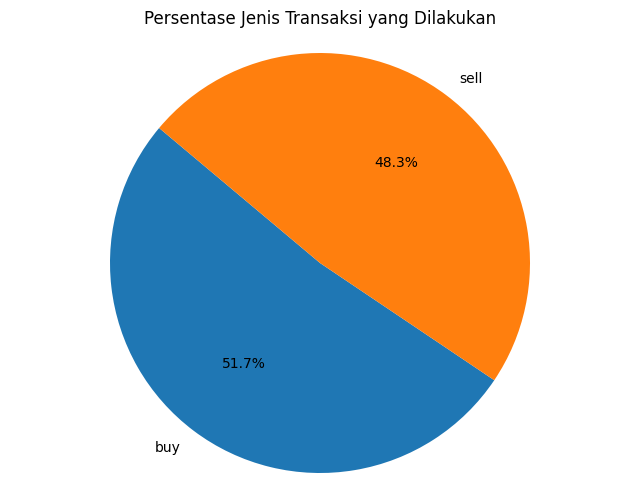

In [90]:
# Menghitung persentase transaksi buy dan sell
transaction_percentages = transaction_counts / transaction_counts.sum() * 100

# Membuat visualisasi menggunakan pie chart
plt.figure(figsize=(8, 6))
plt.pie(transaction_percentages, labels=transaction_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Jenis Transaksi yang Dilakukan')
plt.axis('equal')
plt.show()

# f. Rata-rata nilai transaksi jual pada setiap tahun untuk semua jenis saham.

C:\Users\ACER\AppData\Local\Temp\ipykernel_8356\3021669838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_convert['trade_date'] = pd.to_datetime(df_convert['trade_date'])


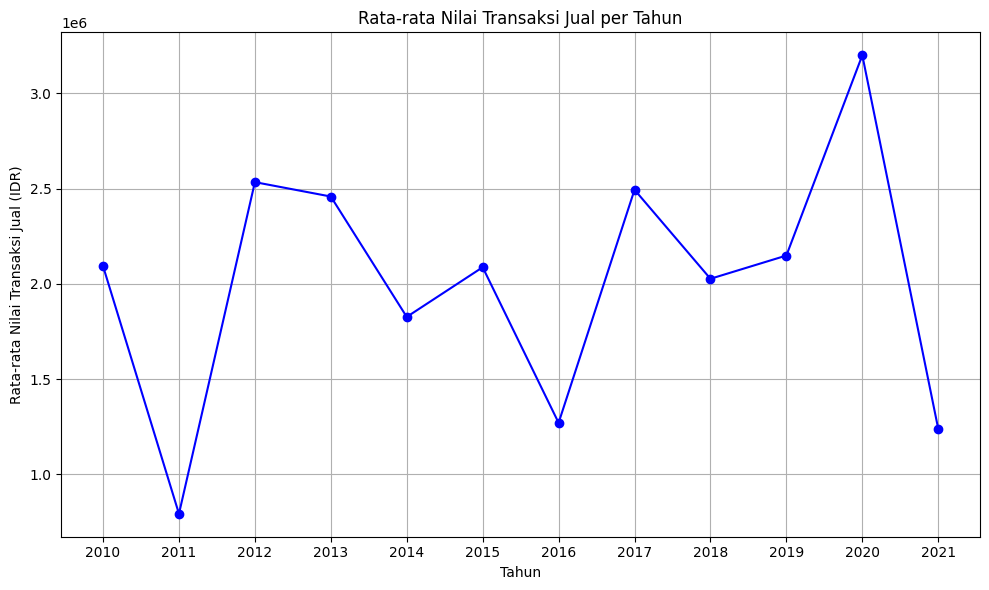

In [93]:
# Mengkonversi kolom 'trade_date' ke tipe data datetime
df_convert['trade_date'] = pd.to_datetime(df_convert['trade_date'])

# Mengambil data transaksi jual saja
sell_transactions = df_convert[df_convert['trade_type'] == 'sell']

# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata nilai transaksi jual
sell_transactions_by_year = sell_transactions.groupby(sell_transactions['trade_date'].dt.year)['trade_price_idr'].mean()

# Membuat visualisasi menggunakan line plot
plt.figure(figsize=(10, 6))
sell_transactions_by_year.plot(marker='o', linestyle='-', color='b')
plt.title('Rata-rata Nilai Transaksi Jual per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Nilai Transaksi Jual (IDR)')
plt.grid(True)
plt.xticks(sell_transactions_by_year.index)
plt.tight_layout()
plt.show()